# Acquire

1st step is to aquire the data from the Codeup db.

In [298]:
#Libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Exploring
import scipy.stats as stats
import math

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
# pd.options.display.float_format = '{:20,.2f}'.format

# import acquire
# import summarize
# import prepare

In [115]:
import acquire

In [116]:
import os
import env

In [4]:
# Add how handling nulls and document how we're handling them.
# Handle outliers and document (add to README).

In [425]:
# Importing and displaying the zillow dataframe

df = acquire.get_zillow_data()
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,3.5,4.0,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,1.0,2.0,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,1,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,2.0,3.0,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,3.0,4.0,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,3,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,3.0,3.0,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,4,0.006940,10887214,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [8]:
# Finding the shape of the dataframe to make sure it matches the shape of the data that I built in MySQLPro.

df.shape

(77381, 70)

In [9]:
# Using .info() to find the dtypes of the columns, and to have a baseline count of non-nulls in each column to compare to my nulls when I get into the prep stage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [10]:
df.describe()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror,pid
count,7.738100e+04,222.000000,50.0,77381.000000,49440.000000,15.000000,206.000000,24953.000000,7.738100e+04,50.000000,...,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000,77381.000000,7.738100e+04
mean,1.300715e+07,6.040541,7.0,261.826340,3.920510,3.933333,7.388350,1.813289,1.495139e+06,679.720000,...,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,38848.692754,0.016625,1.300715e+07
std,3.481346e+06,0.557285,0.0,5.141199,3.592779,0.258199,2.734542,2.967894,8.609071e+05,689.703546,...,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,22402.429065,0.170191,3.481346e+06
min,1.071186e+07,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,3.490000e+02,38.000000,...,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420,1.071186e+07
25%,1.153830e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,7.520700e+05,273.000000,...,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,19461.000000,-0.024377,1.153830e+07
50%,1.253157e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.497932e+06,515.000000,...,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,38870.000000,0.006627,1.253157e+07
75%,1.421183e+07,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,2.240535e+06,796.500000,...,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,58253.000000,0.039203,1.421183e+07
max,1.676893e+08,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,2.982274e+06,3560.000000,...,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,5.262999,1.676893e+08


In [12]:
df.taxamount.value_counts()

2418.22     8
3720.52     7
2217.31     5
1725.20     5
3815.22     5
           ..
5434.38     1
3716.17     1
7358.73     1
4654.70     1
10240.00    1
Name: taxamount, Length: 73825, dtype: int64

In [19]:
# I think a better way of dividing up these variables might be using cut??
def roundup(x):
    return int(math.ceil(x / 100.0)) * 100

In [25]:
def rounddown(x):
    return int(math.floor(x / 100.0)) * 100

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [6]:
df.isna().sum()

parcelid                      0
typeconstructiontypeid    77159
storytypeid               77331
propertylandusetypeid         0
heatingorsystemtypeid     27941
                          ...  
buildingclassdesc         77366
heatingorsystemdesc       27941
propertylandusedesc           0
storydesc                 77331
typeconstructiondesc      77159
Length: 70, dtype: int64

In [7]:
df.shape

(77381, 70)

In [8]:
num_row_missing = df.isna().sum()
num_row_missing

parcelid                      0
typeconstructiontypeid    77159
storytypeid               77331
propertylandusetypeid         0
heatingorsystemtypeid     27941
                          ...  
buildingclassdesc         77366
heatingorsystemdesc       27941
propertylandusedesc           0
storydesc                 77331
typeconstructiondesc      77159
Length: 70, dtype: int64

In [15]:
# Decided to round this column, but can remove the round() command if needed to match the curriculum exactly.
pct_rows_missing = round(num_row_missing/df.shape[0], 3)

In [16]:
df_missing = pd.DataFrame({'num_row_missing': num_row_missing, 'pct_rows_missing': pct_rows_missing})
df_missing.head()

,num_row_missing,pct_rows_missing
parcelid,0,0.000
typeconstructiontypeid,77159,0.997
storytypeid,77331,0.999
propertylandusetypeid,0,0.000
heatingorsystemtypeid,27941,0.361


In [17]:
# Now to create the function:

def zillow_missing_values(df):
    
    total_rows = df.shape[0]
    
    # Count of missing values per column
    num_row_missing = df.isna().sum()
    
    # Pct of missing values per column
    pct_rows_missing = num_row_missing/total_rows
    
    df_missing = pd.DataFrame({'num_row_missing': num_row_missing, 'pct_rows_missing': pct_rows_missing})
    
    return df_missing
    

In [18]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,0.006940,10887214,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [426]:
df_missing_test = zillow_missing_values(df)
df_missing_test

,num_row_missing,pct_rows_missing
parcelid,0,0.000000
typeconstructiontypeid,77159,0.997131
storytypeid,77331,0.999354
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,27941,0.361083
buildingclasstypeid,77366,0.999806
architecturalstyletypeid,77175,0.997338
airconditioningtypeid,52428,0.677531
id,0,0.000000
basementsqft,77331,0.999354


#### Takeaways on Missing Values

- There are three points about taking care of the missing values:
    1. Columns at > 50% missing values should probably be dropped.
    2. Or if there is no need for the column from a modeling perspective, and most of the column is missing values, then it's dropped.
    3. Conversely, if a column has > 50% missing values but there is a modeling need for that data, the column may be retained.

### Columns Missing Info

4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [40]:
df.nunique()

parcelid                        77381
typeconstructiontypeid              4
storytypeid                         1
propertylandusetypeid              13
heatingorsystemtypeid              10
buildingclasstypeid                 2
architecturalstyletypeid            5
airconditioningtypeid               5
id                              77381
basementsqft                       43
bathroomcnt                        22
bedroomcnt                         16
buildingqualitytypeid              12
calculatedbathnbr                  21
decktypeid                          1
finishedfloor1squarefeet         1787
calculatedfinishedsquarefeet     4972
finishedsquarefeet12             4868
finishedsquarefeet13               13
finishedsquarefeet15             1724
finishedsquarefeet50             1807
finishedsquarefeet6               350
fips                                3
fireplacecnt                        5
fullbathcnt                        13
garagecarcnt                       14
garagetotals

In [55]:
# Percentage of each row that have missing column info.
df.isna().sum(axis = 1)

0        36
1        33
2        34
3        32
4        29
         ..
77376    33
77377    32
77378    32
77379    34
77380    34
Length: 77381, dtype: int64

In [57]:
# Percentage of each row that do not have missing column info.

# df.notna().sum(axis = 1) / df.shape[1]
df.isna().sum(axis = 1) / df.shape[1]

0        0.514286
1        0.471429
2        0.485714
3        0.457143
4        0.414286
           ...   
77376    0.471429
77377    0.457143
77378    0.457143
77379    0.485714
77380    0.485714
Length: 77381, dtype: float64

In [107]:
# of rows missing

df.isna().sum(axis = 1).value_counts().sort_index()

23        2
24       13
25       24
26       65
27      316
28      455
29     5270
30     3455
31     9891
32    12579
33    14782
34    13327
35     5148
36     5775
37     3620
38     1925
39      285
40      230
41       29
42       23
43       28
44       78
45       50
46        5
47        3
48        3
dtype: int64

In [166]:
# pct cols missing
(df.isna().sum(axis = 1).value_counts(normalize = True).sort_index() * 100).reset_index()

,index,0
0,23,0.002585
1,24,0.016800
2,25,0.031015
3,26,0.084000
4,27,0.408369
5,28,0.588000
6,29,6.810457
7,30,4.464920
8,31,12.782208
9,32,16.255928


In [ ]:
# Trying to reset the column so that I can get the dataframe above...

df_col = pd.DataFrame({'pct_cols_missing': (df.isna().sum(axis = 1).value_counts(normalize = True).sort_index() * 100).reset_index()})

In [158]:
df_col['num_cols_missing'] = df.isna().sum(axis = 1)
df_col

,pct_cols_missing,num_cols_missing
23,0.002585,33
24,0.016800,31
25,0.031015,33
26,0.084000,31
27,0.408369,31
28,0.588000,33
29,6.810457,34
30,4.464920,32
31,12.782208,34
32,16.255928,33


In [ ]:
# This isn't right.

In [159]:
def count_and_percent_missing_column(df):
    num_rows = df.loc[:].isnull().sum()
    num_cols_missing = df.loc[:, df.isna().any()].count()
    pct_cols_missing = round(df.loc[:, df.isna().any()].count() / len(df.index) * 100, 3)
    missing_cols_and_rows_df = pd.DataFrame({'num_cols_missing': num_cols_missing,
                                             'pct_cols_missing': pct_cols_missing,
                                             'num_rows': num_rows})
    missing_cols_and_rows_df = missing_cols_and_rows_df.fillna(0)
    missing_cols_and_rows_df['num_cols_missing'] = missing_cols_and_rows_df['num_cols_missing'].astype(int)
    return missing_cols_and_rows_df

In [173]:
df2_test = count_and_percent_missing_column(df)
df2_test.head()

,num_cols_missing,pct_cols_missing,num_rows
airconditioningdesc,24953,32.247,52428
airconditioningtypeid,24953,32.247,52428
architecturalstyledesc,206,0.266,77175
architecturalstyletypeid,206,0.266,77175
assessmentyear,0,0.000,0


In [163]:
df['num_cols_missing'] = df.isna().sum(axis = 1)
df.num_cols_missing.head()

0    36
1    33
2    34
3    32
4    29
Name: num_cols_missing, dtype: int64

In [427]:
df['pct_cols_missing'] = df.isna().sum(axis = 1) / df.shape[1]
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,...,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,pct_cols_missing
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,3.5,4.0,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,...,122,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,0.514286
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,1.0,2.0,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,...,1110,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,1,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,0.471429
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,2.0,3.0,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,...,122,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,0.485714
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,3.0,4.0,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,...,0101,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,3,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,0.457143
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,3.0,3.0,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,...,010C,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,4,0.006940,10887214,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN,0.414286


In [92]:
round(df.loc[:, df.isna().any()].count() / len(df.index) * 100, 3)

typeconstructiontypeid           0.287
storytypeid                      0.065
heatingorsystemtypeid           63.892
buildingclasstypeid              0.019
architecturalstyletypeid         0.266
airconditioningtypeid           32.247
basementsqft                     0.065
buildingqualitytypeid           64.191
calculatedbathnbr               99.213
decktypeid                       0.793
finishedfloor1squarefeet         7.784
calculatedfinishedsquarefeet    99.747
finishedsquarefeet12            95.306
finishedsquarefeet13             0.053
finishedsquarefeet15             3.889
finishedsquarefeet50             7.784
finishedsquarefeet6              0.499
fireplacecnt                    10.695
fullbathcnt                     99.213
garagecarcnt                    32.920
garagetotalsqft                 32.920
hashottuborspa                   1.988
lotsizesquarefeet               89.353
poolcnt                         20.854
poolsizesum                      1.120
pooltypeid10             

In [104]:
df.loc[:, df.isna().any()]

,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,basementsqft,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertyzoningdesc,regionidcity,regionidneighborhood,regionidzip,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,633.0,NaN,4506.0,NaN,NaN,NaN,NaN,NaN,NaN,53571.0,NaN,96978.0,1.0,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,537569.0,11013.72,NaN,NaN,6.059063e+13,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,1.0,1.0,1.0,0.0,NaN,12647.0,NaN,NaN,NaN,NaN,NaN,NaN,13091.0,NaN,97099.0,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,376000.0,5672.48,NaN,NaN,6.111001e+13,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,440.0,NaN,8432.0,1.0,NaN,NaN,NaN,1.0,NaN,21412.0,NaN,97078.0,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,479489.0,6488.30,NaN,NaN,6.059022e+13,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,13038.0,1.0,NaN,NaN,NaN,1.0,LCR110000*,396551.0,NaN,96330.0,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,36225.0,1777.51,NaN,NaN,6.037300e+13,NaN,NaN,NaN,Central,NaN,NaN
4,NaN,NaN,2.0,NaN,NaN,1.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,278581.0,1.0,NaN,NaN,NaN,1.0,LAR3,12447.0,268548.0,96451.0,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,45726.0,1533.89,NaN,NaN,6.037124e+13,Central,NaN,NaN,Central,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,NaN,NaN,2.0,NaN,NaN,NaN,NaN,6.0,2.0,NaN,NaN,1286.0,1286.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,47405.0,NaN,NaN,NaN,NaN,NaN,LARE40,12447.0,27328.0,96284.0,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,70917.0,354621.0,283704.0,4478.43,NaN,NaN,6.037101e+13,NaN,NaN,NaN,Central,NaN,NaN
77377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1612.0,1612.0,1612.0,NaN,NaN,1612.0,NaN,1.0,2.0,2.0,560.0,NaN,12105.0,NaN,NaN,NaN,NaN,NaN,NaN,27110.0,NaN,97116.0,NaN,NaN,656.0,NaN,1964.0,1.0,NaN,50683.0,67205.0,16522.0,1107.48,NaN,NaN,6.111008e+13,NaN,NaN,NaN,NaN,NaN,NaN
77378,NaN,NaN,2.0,NaN,NaN,1.0,NaN,4.0,1.0,NaN,NaN,1032.0,1032.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5074.0,NaN,NaN,NaN,NaN,NaN,SER1*,36502.0,NaN,96480.0,NaN,1.0,NaN,NaN,1954.0,NaN,NaN,32797.0,49546.0,16749.0,876.43,NaN,NaN,6.037434e+13,Central,NaN,NaN,Central,NaN,NaN
77379,NaN,NaN,2.0,NaN,NaN,NaN,NaN,6.0,2.0,NaN,NaN,1762.0,1762.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6347.0,NaN,NaN,NaN,NaN,NaN,WHR16000*,14634.0,NaN,96171.0,NaN,1.0,NaN,NaN,1955.0,NaN,NaN,140000.0,522000.0,382000.0,6317.15,NaN,NaN,6.037503e+13,NaN,NaN,NaN,Central,NaN,NaN


In [103]:
df.isna().sum(axis = 1) / df.shape[0]

0        0.000465
1        0.000426
2        0.000439
3        0.000414
4        0.000375
           ...   
77376    0.000426
77377    0.000414
77378    0.000414
77379    0.000439
77380    0.000439
Length: 77381, dtype: float64

In [ ]:
# I still think I should be able to use what I've already done above with value_counts to complete this.

In [113]:
df.isnull()/df.shape[1]

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,...,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,num_cols_missing,pct_cols_missing
0,0.0,0.013889,0.013889,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.0,0.013889,0.0,0.013889,0.013889,0.0,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.000000,0.000000,0.013889,0.0,0.0,0.0,0.013889,0.013889,0.013889,0.013889,...,0.013889,0.0,0.0,0.0,0.013889,0.0,0.0,0.000000,0.013889,0.013889,0.013889,0.0,0.013889,0.013889,0.0,0.0,0.0,0.0,0.0,0.013889,0.013889,0.0,0.0,0.0,0.0,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.013889,0.0,0.0
1,0.0,0.013889,0.013889,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.0,0.013889,0.0,0.013889,0.000000,0.0,0.0,0.013889,0.013889,0.000000,0.013889,0.0,0.000000,0.0,0.000000,0.000000,0.013889,0.0,0.0,0.0,0.013889,0.013889,0.013889,0.013889,...,0.013889,0.0,0.0,0.0,0.013889,0.0,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.000000,0.013889,0.0,0.0,0.0,0.0,0.0,0.013889,0.013889,0.0,0.0,0.0,0.0,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.013889,0.0,0.0
2,0.0,0.013889,0.013889,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.0,0.013889,0.0,0.013889,0.013889,0.0,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.000000,0.000000,0.013889,0.0,0.0,0.0,0.000000,0.013889,0.013889,0.013889,...,0.013889,0.0,0.0,0.0,0.013889,0.0,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.000000,0.013889,0.0,0.0,0.0,0.0,0.0,0.013889,0.013889,0.0,0.0,0.0,0.0,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.013889,0.0,0.0
3,0.0,0.013889,0.013889,0.0,0.000000,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.0,0.000000,0.0,0.013889,0.013889,0.0,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.013889,0.013889,0.013889,0.0,0.0,0.0,0.000000,0.013889,0.013889,0.013889,...,0.000000,0.0,0.0,0.0,0.013889,0.0,0.0,0.013889,0.000000,0.013889,0.013889,0.0,0.013889,0.013889,0.0,0.0,0.0,0.0,0.0,0.013889,0.013889,0.0,0.0,0.0,0.0,0.0,0.013889,0.013889,0.013889,0.000000,0.0,0.013889,0.013889,0.0,0.0
4,0.0,0.013889,0.013889,0.0,0.000000,0.013889,0.013889,0.000000,0.0,0.013889,0.0,0.0,0.000000,0.0,0.013889,0.013889,0.0,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.013889,0.013889,0.013889,0.0,0.0,0.0,0.000000,0.013889,0.013889,0.013889,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.013889,0.000000,0.013889,0.013889,0.0,0.013889,0.013889,0.0,0.0,0.0,0.0,0.0,0.013889,0.013889,0.0,0.0,0.0,0.0,0.0,0.000000,0.013889,0.013889,0.000000,0.0,0.013889,0.013889,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,0.0,0.013889,0.013889,0.0,0.000000,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.0,0.000000,0.0,0.013889,0.013889,0.0,0.0,0.013889,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.013889,0.013889,0.013889,0.0

In [193]:
df_col = df

In [196]:
num_missing = df.isnull().sum()
rows_count = df.shape[0]
pct_missing = num_missing / rows_count

In [197]:
cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'pct_rows_missing': pct_missing})

In [200]:
# Ryan's solutions:

def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows_count = df.shape[0]
    pct_missing = num_missing / rows_count
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'pct_rows_missing': pct_missing})
    return cols_missing

In [199]:
nulls_by_col(df)

,number_missing_rows,pct_rows_missing
parcelid,0,0.000000
typeconstructiontypeid,77159,0.997131
storytypeid,77331,0.999354
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,27941,0.361083
buildingclasstypeid,77366,0.999806
architecturalstyletypeid,77175,0.997338
airconditioningtypeid,52428,0.677531
id,0,0.000000
basementsqft,77331,0.999354


In [201]:
# Summary; I need to better understand how the [] and [[]] work together to creating iteration and when they do not create iteration.

# I still think there's a way to use value_counts() to get this done, but I'm running into problems with the %

# So I was close; Ryan in his answers kinda used that concept.

In [180]:
# Attempting to build dataframe only using .value_counts to group.
# (df.isna().sum(axis = 1).value_counts(normalize = True).sort_index() * 100).reset_index()

df3_test = pd.DataFrame(df.isna().sum(axis = 1).value_counts().sort_index().reset_index())

In [202]:
# Ryan's solution:

def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing 

null_rows = nulls_by_row(df)
null_rows.sort_values(by="pct_cols_missing", ascending=False, inplace=True)
null_rows

,num_cols_missing,pct_cols_missing,num_rows
25,48,67.6056338028169,3
24,47,66.19718309859155,3
23,46,64.7887323943662,5
22,45,63.38028169014085,50
21,44,61.97183098591549,78
20,43,60.56338028169014,28
19,42,59.154929577464785,23
18,41,57.74647887323944,29
17,40,56.33802816901409,230
16,39,54.929577464788736,285


In [203]:
# Nice. So the key here is that I use the .value_counts AFTER we create the function. Not inside the function.

# Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [428]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 70)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [26]:
df.propertylandusedesc.value_counts()

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

#### Plan for Isolating Single Use properties:

Since the vast majority of all single use properties appear to be single use homes, I'm going to use these codes to isolate the properties that I want: 261.0, 260.0, 262.0, 263.0, 264.0. That way I'm not only using `unitcnt`.

In [208]:
# Looking at the type of building and remove those that aren't highly likely to be single unit properties...

include_ids = [261.0, 260.0, 262.0, 263.0, 264.0]
df = df[df.propertylandusetypeid.isin(include_ids)]
df.shape

(52437, 71)

In [209]:
df.unitcnt.value_counts()

1.0    33803
2.0       28
4.0        2
3.0        1
Name: unitcnt, dtype: int64

## Question 2:

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. *Be sure to drop the columns prior to the rows in your function.*
- **Hint:**
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
    - Make use of inplace, i.e. inplace=True/False.

In [211]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,...,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,num_cols_missing
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,3.5,4.0,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,...,122,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,36
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,1.0,2.0,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,...,1110,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,1,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,33
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,2.0,3.0,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,...,122,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,34
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,3.0,4.0,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,...,0101,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,3,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,32
6,12095076,NaN,NaN,261.0,2.0,NaN,NaN,1.0,781532,NaN,3.0,4.0,9.0,3.0,NaN,NaN,2962.0,2962.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34145202.0,-118179824.0,63000.0,1.0,NaN,NaN,NaN,...,0101,PSR2,6.037461e+07,47019.0,3101.0,274684.0,96293.0,0.0,NaN,1.0,NaN,NaN,1950.0,NaN,NaN,276684.0,773303.0,2016.0,496619.0,9516.26,NaN,NaN,6.037461e+13,6,-0.001011,12095076,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN,29


In [213]:
# Dropping the unecessary columns:

df = df.drop(columns = ['id.1', 'id'] )

In [429]:
def drop_id_cols(df):
    df = df.drop(columns = ['id.1', 'id'])
    return df

In [215]:
threshold = int(round(.6*len(df.index),0))
threshold

31462

In [221]:
len(df.index)

52437

## Testing the property function

In [505]:
zillow = acquire.get_zillow_data()
zillow.shape

(77381, 70)

In [506]:
id_list_choice = [261.0, 260.0, 262.0, 263.0, 264.0]

In [507]:
def property_type_focus(df, id_list):
#     id_list = [261.0, 260.0, 262.0, 263.0, 264.0]
    df = df[df.propertylandusetypeid.isin(id_list)]
    return df

In [508]:
zillow.shape

(77381, 70)

In [509]:
zillow = property_type_focus(zillow, id_list_choice)
zillow.shape

(52437, 70)

In [510]:
def handle_missing_values(df, col_limit = .6, row_limit = .6):
    
    df.drop(columns = ['id.1', 'id', 'propertyzoningdesc', 'calculatedbathnbr'], inplace = True)
    df.drop
    # Setting the threshold for columns to drop:
    col_thresh = int(round(col_limit * len(df.index), 0))
    df.dropna(axis = 1, thresh = col_thresh, inplace = True)
    # Now for the rows:
    row_thresh = int(round(col_limit * len(df.columns), 0))
    df.dropna(axis = 0, thresh = row_thresh, inplace = True)
    return df
    

In [511]:
zillow = handle_missing_values(zillow)

In [512]:
zillow.shape

(52437, 32)

## Splitting Zillow Data Function

In [513]:
def split_zillow_data(df):
    # df = get_mall_data()
    # Splitting my data based on the target variable of tenure:
    train_validate, test = train_test_split(df, test_size=.15, random_state=123)
    
    # Splitting the train_validate set into the separate train and validate datasets.
    train, validate = train_test_split(train_validate, test_size=.20, random_state=123)
    
    # Printing the shape of each dataframe:
    print(f'Shape of train df: {train.shape}')
    print(f'Shape of validate df: {validate.shape}')
    print(f'Shape of test df: {test.shape}')
    return train, validate, test

In [514]:
train, validate, test = split_zillow_data(zillow)
train.head()

Shape of train df: (35656, 32)
Shape of validate df: (8915, 32)
Shape of test df: (7866, 32)


,parcelid,propertylandusetypeid,heatingorsystemtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,pid,tdate,heatingorsystemdesc,propertylandusedesc
9322,11769252,261.0,2.0,2.0,3.0,6.0,1168.0,1168.0,6037.0,2.0,34004552.0,-118253888.0,6979.0,0100,6.037228e+07,12447.0,3101.0,95992.0,0.0,1.0,1980.0,40466.0,179231.0,2016.0,138765.0,2244.26,6.037228e+13,0.019605,11769252,2017-02-13,Central,Single Family Residential
37985,13885646,261.0,NaN,2.0,3.0,NaN,1286.0,1286.0,6059.0,2.0,33784582.0,-117862578.0,6372.0,122,6.059076e+07,33252.0,1286.0,97066.0,6.0,NaN,1950.0,92972.0,135979.0,2016.0,43007.0,1678.70,6.059076e+13,-0.037493,13885646,2017-05-19,NaN,Single Family Residential
4751,14190000,261.0,NaN,2.5,4.0,NaN,2114.0,2114.0,6059.0,2.0,33886971.0,-117796229.0,12600.0,122,6.059022e+07,21412.0,1286.0,97078.0,8.0,NaN,1965.0,70011.0,114314.0,2016.0,44303.0,1512.32,6.059022e+13,-0.041078,14190000,2017-01-23,NaN,Single Family Residential
45321,11712736,261.0,7.0,1.0,3.0,6.0,1151.0,1151.0,6037.0,1.0,34016482.0,-118356907.0,9396.0,0100,6.037236e+07,12447.0,3101.0,95989.0,0.0,1.0,1947.0,111083.0,471018.0,2016.0,359935.0,5756.00,6.037236e+13,-0.074994,11712736,2017-06-12,Floor/Wall,Single Family Residential
65834,10932423,261.0,2.0,3.0,4.0,7.0,2909.0,2909.0,6037.0,3.0,34144370.0,-118363017.0,7461.0,0100,6.037144e+07,12447.0,3101.0,96447.0,0.0,1.0,1997.0,158958.0,1012640.0,2016.0,853682.0,12280.04,6.037144e+13,0.099002,10932423,2017-08-11,Central,Single Family Residential


In [515]:
train.isnull().sum().sort_values(ascending = False)

buildingqualitytypeid           12736
unitcnt                         12666
heatingorsystemtypeid           12660
heatingorsystemdesc             12660
regionidcity                      699
lotsizesquarefeet                 257
finishedsquarefeet12              205
fullbathcnt                       115
yearbuilt                         103
censustractandblock                86
calculatedfinishedsquarefeet       80
structuretaxvaluedollarcnt         55
regionidzip                        16
taxamount                           3
taxvaluedollarcnt                   1
landtaxvaluedollarcnt               1
bedroomcnt                          0
latitude                            0
bathroomcnt                         0
fips                                0
propertylandusetypeid               0
propertylandusedesc                 0
longitude                           0
propertycountylandusecode           0
rawcensustractandblock              0
regionidcounty                      0
roomcnt     

### 3. Filling Missing Values

**After splitting the df into train, validate, test:**

Decide how to handle the remaining missing values:

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In deciding how to fill the missing values, I'm going to for the mean for the majority of the columns. Knowing the data and what I'm trying to find from it, adding a bunch of values to the average *shouldn't* change the outcome of any model I'm building too much. However, I'll have to bookmark the decision I'm making here and come back to it (and maybe change my mind) if the models I start creating are appears to be messed up in some way.

In [516]:
# Impute missing values, after splitting.

cols = [
    "structuretaxvaluedollarcnt",
    "taxamount",
    "taxvaluedollarcnt",
    "landtaxvaluedollarcnt",
    "structuretaxvaluedollarcnt",
    "finishedsquarefeet12",
    "calculatedfinishedsquarefeet",
    "fullbathcnt",
    "lotsizesquarefeet",
    "heatingorsystemtypeid"
]


for col in cols:
    median = train[col].median()
    train[col].fillna(median, inplace=True)
    validate[col].fillna(median, inplace=True)
    test[col].fillna(median, inplace=True)

In [517]:
train.isnull().sum().sort_values(ascending = False)

buildingqualitytypeid           12736
unitcnt                         12666
heatingorsystemdesc             12660
regionidcity                      699
yearbuilt                         103
censustractandblock                86
regionidzip                        16
fips                                0
latitude                            0
fullbathcnt                         0
finishedsquarefeet12                0
lotsizesquarefeet                   0
calculatedfinishedsquarefeet        0
bedroomcnt                          0
bathroomcnt                         0
heatingorsystemtypeid               0
propertylandusetypeid               0
longitude                           0
propertylandusedesc                 0
propertycountylandusecode           0
rawcensustractandblock              0
regionidcounty                      0
roomcnt                             0
structuretaxvaluedollarcnt          0
taxvaluedollarcnt                   0
assessmentyear                      0
landtaxvalue

In [518]:
# Categorical/Discrete columns to use mode to replace nulls

cols = [
    "buildingqualitytypeid",
    "regionidcity",
    "regionidzip",
    "yearbuilt",
    "regionidcity",
    "censustractandblock"
]

for col in cols:
    mode = int(train[col].mode()) # I had some friction when this returned a float (and there were no decimals anyways)
    train[col].fillna(value=mode, inplace=True)
    validate[col].fillna(value=mode, inplace=True)
    test[col].fillna(value=mode, inplace=True)

In [521]:
train.isnull().sum().sort_values(ascending = False)

unitcnt                         12666
propertylandusedesc                 0
rawcensustractandblock              0
propertylandusetypeid               0
heatingorsystemtypeid               0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
calculatedfinishedsquarefeet        0
finishedsquarefeet12                0
fips                                0
fullbathcnt                         0
latitude                            0
longitude                           0
lotsizesquarefeet                   0
propertycountylandusecode           0
regionidcity                        0
heatingorsystemdesc                 0
regionidcounty                      0
regionidzip                         0
roomcnt                             0
yearbuilt                           0
structuretaxvaluedollarcnt          0
taxvaluedollarcnt                   0
assessmentyear                      0
landtaxvaluedollarcnt               0
taxamount   

In [522]:
cols3 = [
    "unitcnt"
]

for col in cols3:
    train[col].fillna(value=1, inplace=True)
    validate[col].fillna(value=1, inplace=True)
    test[col].fillna(value=1, inplace=True)

In [523]:
train.isnull().sum().sort_values(ascending = False)

propertylandusedesc             0
heatingorsystemdesc             0
propertylandusetypeid           0
heatingorsystemtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
pid           

In [ ]:
def imputing_missing_values(train, validate, test):
    
    
    cols = [
    "structuretaxvaluedollarcnt",
    "taxamount",
    "taxvaluedollarcnt",
    "landtaxvaluedollarcnt",
    "structuretaxvaluedollarcnt",
    "finishedsquarefeet12",
    "calculatedfinishedsquarefeet",
    "fullbathcnt",
    "lotsizesquarefeet",
    "heatingorsystemtypeid"
    ]


    for col in cols:
        median = train[col].median()
        train[col].fillna(median, inplace=True)
        validate[col].fillna(median, inplace=True)
        test[col].fillna(median, inplace=True)


    # Categorical/Discrete columns to use mode to replace nulls

    cols2 = [
        "buildingqualitytypeid",
        "regionidcity",
        "regionidzip",
        "yearbuilt",
        "regionidcity",
        "censustractandblock"
    ]

    for col in cols2:
        mode = int(train[col].mode()) # I had some friction when this returned a float (and there were no decimals anyways)
        train[col].fillna(value=mode, inplace=True)
        validate[col].fillna(value=mode, inplace=True)
        test[col].fillna(value=mode, inplace=True)
    
    # Taking care of unit count.
    cols3 = [
        "unitcnt"
    ]

    for col in cols3:
        train[col].fillna(value=1, inplace=True)
        validate[col].fillna(value=1, inplace=True)
        test[col].fillna(value=1, inplace=True)
    
        
    return train, validate, test

In [524]:
train.shape

(35656, 32)

In [525]:
train.isnull().sum()

parcelid                        0
propertylandusetypeid           0
heatingorsystemtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
pid                             0
tdate         

In [ ]:
def imputing_missing_values(df):
    
    # First, inputing the median values:
    df.regionidcity = df.regionidcity.fillna(df.regionidcity.median())
    df.regionidzip = df.regionidzip.fillna(df.regionidzip.median())
    df.yearbuilt = df.yearbuilt.fillna(df.yearbuilt.median())
    df.censustractandblock = df.censustractandblock.fillna(df.censustractandblock.median())
    
    # Now using the mean to input the rest of the missing values:
    df.lotsizesquarefeet = df.lotsizesquarefeet.fillna(df.lotsizesquarefeet.mean())
    df.finishedsquarefeet12 = df.finishedsquarefeet12.fillna(df.finishedsquarefeet12.mean())
    df.calculatedbathnbr = df.calculatedbathnbr.fillna(df.calculatedbathnbr.mean())
    df.fullbathcnt = df.fullbathcnt.fillna(round(df.fullbathcnt.mean(),0))
    df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.fillna(round(df.calculatedfinishedsquarefeet.mean(),0))
    df.structuretaxvaluedollarcnt = df.structuretaxvaluedollarcnt.fillna(round(df.structuretaxvaluedollarcnt.mean(),0))
    df.taxamount = df.taxamount.fillna(round(df.taxamount.mean(),0))
    df.landtaxvaluedollarcnt = df.landtaxvaluedollarcnt.fillna(round(df.landtaxvaluedollarcnt.mean(),0))
    df.taxvaluedollarcnt = df.taxvaluedollarcnt.fillna(round(df.taxvaluedollarcnt.mean(),0))
    

## Now imputing values

In [277]:
# I should actually be imputing values AFTER I split the data.

median = df.regionidcity.median()
df.regionidcity = df.regionidcity.fillna(df.regionidcity.median())
df.regionidzip = df.regionidzip.fillna(df.regionidzip.median())
df.censustractandblock = df.censustractandblock.fillna(df.censustractandblock.median())

In [278]:
df.isna().sum().sort_values(ascending = False)

lotsizesquarefeet               374
finishedsquarefeet12            278
calculatedbathnbr               166
fullbathcnt                     166
calculatedfinishedsquarefeet    110
structuretaxvaluedollarcnt       80
taxamount                         4
landtaxvaluedollarcnt             1
taxvaluedollarcnt                 1
bedroomcnt                        0
propertycountylandusecode         0
bathroomcnt                       0
fips                              0
propertylandusetypeid             0
latitude                          0
longitude                         0
num_cols_missing                  0
regionidcity                      0
rawcensustractandblock            0
propertylandusedesc               0
regionidcounty                    0
regionidzip                       0
roomcnt                           0
yearbuilt                         0
assessmentyear                    0
censustractandblock               0
logerror                          0
pid                         

In [279]:
# Now for the mean:

df.lotsizesquarefeet = df.lotsizesquarefeet.fillna(df.lotsizesquarefeet.mean())
df.finishedsquarefeet12 = df.finishedsquarefeet12.fillna(df.finishedsquarefeet12.mean())
df.calculatedbathnbr = df.calculatedbathnbr.fillna(df.calculatedbathnbr.mean())
df.fullbathcnt = df.fullbathcnt.fillna(round(df.fullbathcnt.mean(),0))
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.fillna(round(df.calculatedfinishedsquarefeet.mean(),0))
df.structuretaxvaluedollarcnt = df.structuretaxvaluedollarcnt.fillna(round(df.structuretaxvaluedollarcnt.mean(),0))
df.taxamount = df.taxamount.fillna(round(df.taxamount.mean(),0))
df.landtaxvaluedollarcnt = df.landtaxvaluedollarcnt.fillna(round(df.landtaxvaluedollarcnt.mean(),0))
df.taxvaluedollarcnt = df.taxvaluedollarcnt.fillna(round(df.taxvaluedollarcnt.mean(),0))

df.isna().sum().sort_values(ascending = False)



num_cols_missing                0
propertylandusedesc             0
propertylandusetypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
pid                             0
tdate                           0
parcelid      

All Missing values removed or imputed.

In [520]:
cols3 = ["heatingorsystemdesc"]

for col in cols3:
#     median = train[col].median()
    train[col].fillna("None", inplace = True)
    validate[col].fillna("None", inplace = True)
    test[col].fillna("None", inplace = True)

In [430]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,...,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,pid,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,pct_cols_missing
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,3.5,4.0,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,...,122,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0,0.025595,14297519,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,0.514286
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,1.0,2.0,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,...,1110,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,1,0.055619,17052889,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,0.471429
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,2.0,3.0,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,...,122,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2,0.005383,14186244,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,0.485714
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,3.0,4.0,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,...,0101,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,3,-0.103410,12177905,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,0.457143
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,3.0,3.0,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,...,010C,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,4,0.006940,10887214,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN,0.414286


# Mall Customers

**notebook**
- Acquire data from mall_customers.customers in mysql database.
- Summarize data (include distributions and descriptive statistics).
- Detect outliers using IQR.
- Split data (train-test-split).
- Encode categorical columns using a one hot encoder.
- Handles missing values.
- Scaling

wrangle_mall.py
- Acquire data from mall_customers.customers in mysql database.
- Split the data
- One-hot-encoding
- Missing values
- Scaling

In [373]:
import mall_wrangle

In [378]:
df_mall = mall_wrangle.get_mall_data()
df_mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [363]:
# Summarizing the data:

df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [364]:
print(f'The shape of this dataframe is {df_mall.shape}')
df_mall.describe()

The shape of this dataframe is (200, 5)


,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Detect outliers using IQR.

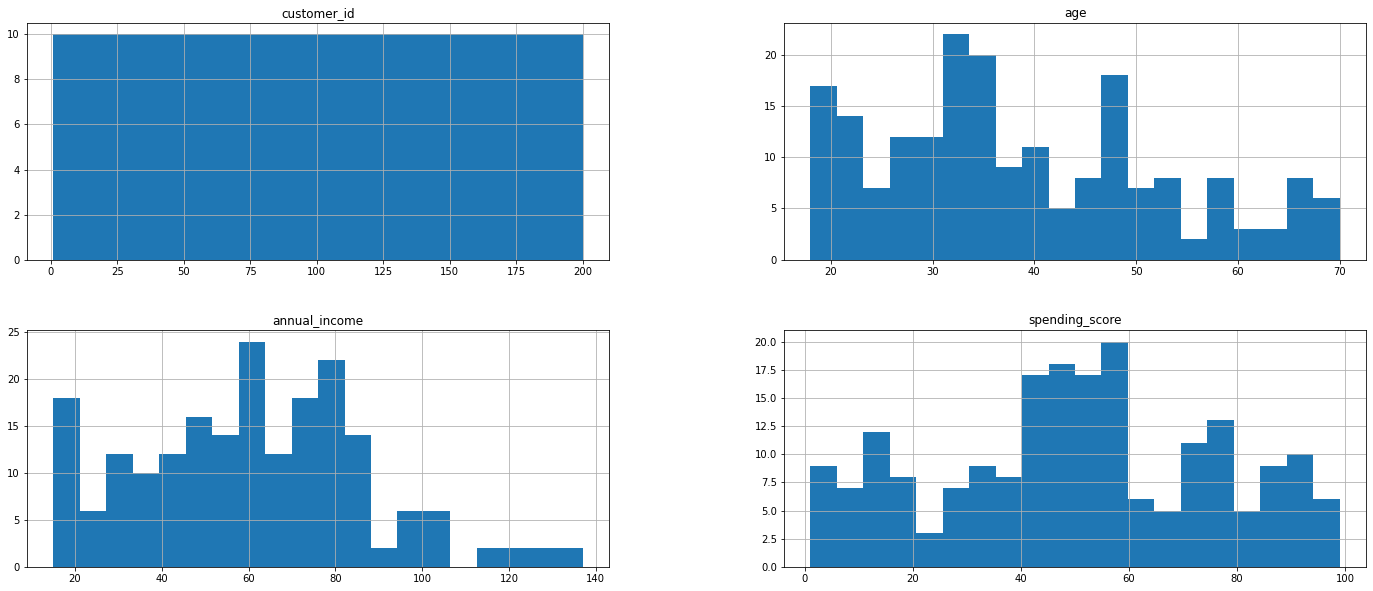

In [388]:
# Visualizing the distribution of the columns

df_mall.hist(figsize=(24, 10), bins = 20)
plt.show()

<AxesSubplot:>

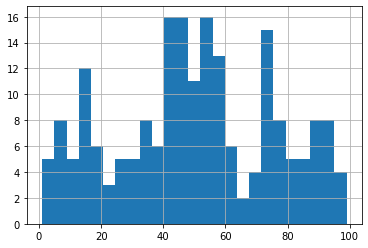

In [398]:
df_mall.spending_score.hist(bins = 25)

In [402]:
q1 = df_mall.spending_score.quantile(.25)
q3 = df_mall.spending_score.quantile(.75)

q1, q3
iqr = q3 - q1

In [404]:
k = 1.5
upper_bound = q3 + (k * iqr)
upper_bound

130.375

In [405]:
df_mall[df_mall.spending_score > upper_bound]

,customer_id,gender,age,annual_income,spending_score


In [407]:
lower_bound = q1 - (k * iqr)
lower_bound
df_mall[df_mall.spending_score < lower_bound]

,customer_id,gender,age,annual_income,spending_score


Does not appear to be any observations outside of the upper or lower bounds.

In [408]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(df_mall, k=1.5)

df_mall.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers
0,1,Male,19,15,39,0,0,0.0,0
1,2,Male,21,15,81,0,0,0.0,0
2,3,Female,20,16,6,0,0,0.0,0
3,4,Female,23,16,77,0,0,0.0,0
4,5,Female,31,17,40,0,0,0.0,0


### Split the data

In [412]:
def split_mall_data_test(df):
    # df = get_mall_data()
    # Splitting my data based on the target variable of tenure:
    train_validate, test = train_test_split(df, test_size=.15, random_state=123)
    
    # Splitting the train_validate set into the separate train and validate datasets.
    train, validate = train_test_split(train_validate, test_size=.20, random_state=123)
    
    # Printing the shape of each dataframe:
    print(f'Shape of train df: {train.shape}')
    print(f'Shape of validate df: {validate.shape}')
    print(f'Shape of test df: {test.shape}')
    return train, validate, test

In [413]:
# I built a function previously that split the mall data:

train, validate, test = split_mall_data(df_mall)
train.head()

Shape of train df: (136, 9)
Shape of validate df: (34, 9)
Shape of test df: (30, 9)


,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers
32,33,Male,53,33,4,0,0,0.0,0
186,187,Female,54,101,24,0,0,0.0,0
77,78,Male,40,54,48,0,0,0.0,0
33,34,Male,18,33,92,0,0,0.0,0
58,59,Female,27,46,51,0,0,0.0,0


### Encode categorical columns using a one hot encoder.

In [385]:
# Based on what I've read, .get_dumbies is a one-hot-encoder. It's only a true dummy encoder if I select to drop the first column in the function.

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, categories='gender')

In [ ]:
# Couldn't get this to work...
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, categories='gender')
# train_matrix = ohe.fit_transform(train[['col']])
# validate_matrix = ohe.transform(validate[['col']])
# test_matrix = ohe.transform(test[['col']])
# train.head()

In [414]:
train['is_male'] = pd.get_dummies(train.gender, drop_first = True) # Leaving the drop_first() argument set to True means that both columns are return.
train.head()
# One for female, one for male. Note that returns an "extra" column that isn't strictly necessary.

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers,is_male
32,33,Male,53,33,4,0,0,0.0,0,1
186,187,Female,54,101,24,0,0,0.0,0,0
77,78,Male,40,54,48,0,0,0.0,0,1
33,34,Male,18,33,92,0,0,0.0,0,1
58,59,Female,27,46,51,0,0,0.0,0,0


In [415]:
validate['is_male'] = pd.get_dummies(validate.gender, drop_first = True)
test['is_male'] = pd.get_dummies(test.gender, drop_first = True)

validate.shape, test.shape

((34, 10), (30, 10))

In [335]:
# If I run the OneHotEncoder, I should end up with basically the same result.

enc = preprocessing.OneHotEncoder()

enc.fit(train)

OneHotEncoder()

In [ ]:
onehotlabels = enc.transform(train).toarray(1)
onehotlabels.shape

In [333]:
onehotlabels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

I couldn't get the OneHotEncoder to work. Still, I was able to accomplish the work by using the .get_dummies, and simply not setting the drop_first argument = False.

#### Handles missing values.

In [417]:
# There do not appear to be any misisng values, but I'll add some code in there...

train.isnull().sum()

customer_id                0
gender                     0
age                        0
annual_income              0
spending_score             0
customer_id_outliers       0
age_outliers               0
annual_income_outliers     0
spending_score_outliers    0
is_male                    0
dtype: int64

In [ ]:
# For filling in any nulls
train.spending_score.fillna(train.spending_score.mean(), inplace = True)
train.age.fillna(train.age.mean(), inplace = True)
train.annual_income.fillna(train.annual_income.median(), inplace = True)


### Scaling 

In [419]:
train.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers,is_male
32,33,Male,53,33,4,0,0,0.0,0,1
186,187,Female,54,101,24,0,0,0.0,0,0
77,78,Male,40,54,48,0,0,0.0,0,1
33,34,Male,18,33,92,0,0,0.0,0,1
58,59,Female,27,46,51,0,0,0.0,0,0


In [420]:
train.shape

(136, 10)